# Data Preprocessing

This notebook contains the preprocessing of the dataset I collected (1946-1963) and the code used to merge Mona Alaert's dataset (1893-1934), Elisabeth Jansen's dataset (1934-1946) and mine. Ultimately creating a dataset combining all the collected data (1893-1963).

## Cleaning up the data

In [1]:
# Loading my dataset (1946-1963)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset.csv', sep=';')
df.sample(10)

,Image,Collection,Production,Date,Occasion,Leaflet Language
6754,Scan 2024-03-18 1529-193.jpeg,1957-1958,Samson en Dalila,07/12/1957,NaN,ned
7789,Scan 2024-03-25 1453-24.jpeg,1959-1960,NaN,NaN,NaN,ned
11720,Scan 2024-04-29 1515-109.jpeg,1961-1962,NaN,NaN,NaN,ned
10117,Scan 2024-04-29 1008-160.jpeg,1960-1961,NaN,NaN,NaN,ned
187,Scan 2024-02-14 1204-39.jpeg,1946-1947,NaN,NaN,NaN,ned
6641,Scan 2024-03-18 1529-80.jpeg,1957-1958,NaN,NaN,NaN,ned
7937,Scan 2024-03-25 1453-172.jpeg,1959-1960,NaN,NaN,NaN,ned
2305,Scan 2024-02-26 1334-40.jpeg,1950-1951,Manon,28/04/1951,NaN,ned
10226,Scan 2024-04-29 1032-76.jpeg,1960-1961,NaN,NaN,NaN,ned
1680,Scan 2024-02-26 1119-9.jpeg,1949-1950,Rink Folkema,26/02/1950,NaN,ned


In [2]:
# Checking the size of the loaded dataset

print(df.shape)

(12451, 6)


In [3]:
# Cells with multiple dates are split so that each row has one date and can be easily converted to datetime
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].str.split(';')
df = df.explode('Date')
df['Date'] = df['Date'].str.strip()

In [4]:
# Converting Date column to datetime

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [5]:
df.sample(10)

,Image,Collection,Production,Date,Occasion,Leaflet Language
6122,Scan 2024-03-18 1335-187.jpeg,1956-1957,NaN,NaT,NaN,ned
7391,Scan 2024-03-25 1047-236.jpeg,1958-1959,NaN,NaT,NaN,ned
12249,Scan 2024-04-29 1742-404.jpeg,1962-1963,De Vogelhandelaar,1963-03-03,NaN,ned
2089,Scan 2024-02-26 1258-10.jpeg,1950-1951,Laagland,1950-12-07,NaN,ned
3811,Scan 2024-02-28 1354-67.jpeg,1952-1953,NaN,NaT,NaN,ned
10080,Scan 2024-04-29 1008-123.jpeg,1960-1961,NaN,NaT,NaN,ned
972,Scan 2024-02-16 1035-20.jpeg,1948-1949,Tosca,1948-09-26,NaN,ned
323,Scan 2024-02-14 1218-75.jpeg,1946-1947,NaN,NaT,NaN,ned
3725,Scan 2024-02-28 1323-112.jpeg,1952-1953,Het Tovereiland,1953-03-26,NaN,ned
3115,Scan 2024-02-28 1142-7.jpeg,1951-1952,NaN,NaT,NaN,ned


In [6]:
# Delete trailing and leading whitespaces

df['Image'] = df['Image'].str.strip() 
df['Collection'] = df['Collection'].str.strip() 
df['Production'] = df['Production'].str.strip() 
df['Occasion'] = df['Occasion'].str.strip()
df['Leaflet Language'] = df['Leaflet Language'].str.strip()

In [7]:
# Create a new column (boolean) to indicate whether the performance was part of a multiple bill (True) or not (False)

multiple_bills = []
for row in df['Production']:
    if '+' in str(row):
        multiple_bills.append(True)
    else:
        multiple_bills.append(False)


df['Multiple Bill'] = multiple_bills
df['Multiple Bill'].value_counts()

False    12239
True       444
Name: Multiple Bill, dtype: int64

In [8]:
# Create a new column assigning a random ID to each performance

import random
df['Performance_ID'] = random.sample(range(100000, 999999), df.shape[0])
df.head()

,Image,Collection,Production,Date,Occasion,Leaflet Language,Multiple Bill,Performance_ID
0,Scan 2024-02-14 1120-1.jpeg,1946-1947,NaN,NaT,NaN,ned,False,938424
1,Scan 2024-02-14 1120-2.jpeg,1946-1947,NaN,NaT,NaN,NaN,False,994402
2,Scan 2024-02-14 1120-3.jpeg,1946-1947,NaN,NaT,NaN,ned,False,680302
3,Scan 2024-02-14 1120-4.jpeg,1946-1947,NaN,NaT,NaN,ned,False,326709
4,Scan 2024-02-14 1120-5.jpeg,1946-1947,NaN,NaT,NaN,ned,False,659224


In [9]:
# Cells that include a '+' , i.e. a multiple bill are split so that each row only contains one performance
# Using Performance_ID to keep track of those performances that were part of a multiple bill

df['Production'] = df['Production'].astype(str)
df['Production'] = df['Production'].str.split('+')
df = df.explode('Production')
df['Production'] = df['Production'].str.strip()
df = df.reset_index(drop=True)
df.sample(5)

,Image,Collection,Production,Date,Occasion,Leaflet Language,Multiple Bill,Performance_ID
5555,Scan 2024-03-11 1549-382.jpeg,1954-1955,Quinten Massijs,1955-07-12,guldensporenviering,ned,False,643532
5369,Scan 2024-03-11 1549-218.jpeg,1954-1955,Aida,1955-04-10,NaN,ned,False,780024
2079,Scan 2024-02-26 1240-7.jpeg,1950-1951,nan,NaT,NaN,ned,False,118649
11227,Scan 2024-04-29 1150-49.jpeg,1960-1961,nan,NaT,NaN,ned,False,478051
4040,Scan 2024-02-28 1354-135.jpeg,1952-1953,nan,NaT,NaN,ned,False,657012


In [10]:
print(f"Dataset now has {len(df)} rows")

Dataset now has 13201 rows


In [11]:
# Spelling normalization: dictionary to keep track of spelling variations

VariatieC = {
    "Bohème" : ["Boheme", "Bohême", "La Boheme"],
    "Het Land van den Glimlach" : ["Het Land van de Glimlach", "Het land van de glimlach"],
    "Norma" : ["La Norma"],
    "De Schim van de Roos" : ["De schim van de Roos"],
    "De Troubadour" : ["Il Trobadore", "Il Trovatore"],
    "Khowanstchina" : ["Chowansjtsjina", "Khovanstsjina"],
    "Taglioni bij Mussette" : ["Taglioni bij Musette"],
    "De Goochelaar van O.L. Vrouw" : ["de goochelaar van O.L. Vrouw"],
    "Pièces Brillantes" : ["Pieces Brillantes"],
    "Prélude à l'après-midi d'un Faune" : ["Prélude à l'après-midi d'un faune", "Prélude à L'Après -midi d'un Faune", "Prélude à L'Après-Midi d'un Faune", "Prélude à L'Après-midi d'un Faune"],
    "Scheherazade" : ["Sheherazade"],
    "De Blauwe Vogel" : ["De blauwe Vogel"],
    "Assepoes" : ["Cinderella"],
    "L'Arlesiana" : ["Arlequinade"],
    "Thaïs" : ["Thais"],
    "De Barbier van Sevilla" : ["Il Barbiere di Seviglia"],
    "Romeo en Julia" : ["Romeo et Juliette", "Romeo en Juliette"],
    "De Graaf van Luxemburg" : ["Graaf van Luxemburg"],
    "Lucia van Lammermoor" : ["Lucie de Lammermoor", "Lucia di Lammermoor"],
    "Cosi fan Tutte" : ["Cosi Fan Tutte"],
    "André Chénier" : ["Andrea Chenier"],
    "La Grande Tentation de Saint-Antoine" : ["De grote verzoeking van Sint Antonius", "De grote Verzoeking van Sint Antonius", "De Grote Verzoeking van Sint Antonius"],
    "Driemeisjeshuis" : ["Drie-Meisjeshuis", "Het Driemeisjeshuis"],
    "Het Gemaskerd Bal" : ["Un Ballo Il Maschera"],
    "Quatuor" : ["Quator"],
    "Tannhauser" : ["Tannhäuser"],
    "Tooverfluit" : ["De Toverfluit", "De Tooverfluit"],
    "Aïda" : ["Aida"],
    "Don Giovanni" : ["Don Juan"],
    "De Parelvisschers" : ["De Parelvissers"],
    "Lakme" : ["Lakmé"],
    "Madame Butterfly" : ["Madama Butterfly"],
    "Salomé" : ["Salome"],
    "Hoffmann's Vertellingen" : ["Hoffmanns Vertellingen", "Hoffmans Vertellingen"],
    "Czaar en Timmerman" : ["Tsaar en Timmerman"],
    "Ballet-suite" : ["Ballet Suite", "Ballet-Suite"],
    "Het Rijngoud" : ["Rijngoud"],
    "Willem Tell" : ["Wilhelm Tell"],
    "De Walkure" : ["De Walküre"],
    "De Doode Oogen" : ["De Dode Ogen"],
    "Boris Godouwnow" : ["Boris Godounow", "Boris Godoenov"],
    "De Vliegende Hollander" : ["De vliegende Hollander"],
    "Namouna" : ["Namouma"],
    "De Wonderbare Mandarijn" : ["De wonderbare Mandarijn"],
    "Tosca" : ["La Tosca"],
    "De Meesterzangers van Nurenberg" : ["De Meesterzangers van Neurenberg"],
    "Thijl Uilenspiegel" : ["Thyl Uilenspiegel"],
    "Traviata" : ["La Traviata"],
    "Czarsdasvorstin" : ["De Czardasvorstin"],
    "De Heilige van Bleecker Street" : ["De Heilige van de Bleecker Street"],
    "In het Witte Paard" : ["In 't Witte Paard"],
    "De Rozenkavalier" : ["De Rozencavalier"],
    "Vierde Symfonie" : ["Vierde Symphonie"],
    "De Regenboog" : ["Regenboog"],
    "Falstaff" : ["Fallstaff"],
    "Het Kasteel van Blauwbaard" : ["Het kasteel van Blauwbaard"],
    "De Antikwaar" : ["L'Antiquaire"],
    "Uitnodiging tot de dans" : ["Uitnodiging tot de Dans"],
    "De Bacchanale" : ["Bacchanale"],
    "Roemeense Rhapsodie" : ["Roemeense Rapsodie"],
    "De Sylphiden" : ["Sylfiden", "De Sylfide", "De Sylfiden"],
    "Jenufa" : ["Jenoefa"],
}

In [12]:
# Function that iterates over the values in the dictionary and returns the key if the title is found in these values
# If the title is not in the dictionary, there is not spelling variation for this title in the dataset

def clean_titles (row):

    for key, values in VariatieC.items():
        if str(row) in str(values):
            #print('it is in the values')
            return key
        elif row == key:
            return key
    else:
        return row 

In [13]:
# Quick test on some frequent variations

a = "Hoffmans Vertellingen"
b = "Tannhäuser"
c = "Salome"

print(clean_titles(a))
print(clean_titles(b))
print(clean_titles(c))

Hoffmann's Vertellingen
Tannhauser
Salomé


In [14]:
# Now applying this function to the entire dataset, the normalized spelling is gathered in a new column called 'Normalized Title'

df['Normalized Title'] = df['Production'].apply(clean_titles)

## Adding metadata

Loading a dictionary-formatted txt-file containing additional metadata. This file was created by Mona Allaert and supplemented with new metadata by Elisabeth Jansen and me.
- Key = normalized title
- Value [0] = original language
- Value [1] = composer
- Value [2] = year of first performance
- Value [3] = original title
- Value [4] = genre
- Value [5] = language of normalized title

In [15]:
# Loading the metadata

with open('META3.txt','r', encoding = 'UTF8') as inf:
    Metadata = eval(inf.read())

In [16]:
# Check if the file is formatted correctly

output = []
for key, values in Metadata.items():
    if len(values) != 6:
       output.append(values)
       print(output)

if len(output) == 0:
    print('Looking good!')

Looking good!


In [17]:
# Function that identifies the original language based on the metadata

def add_language (row):
    for key, values in Metadata.items():
        if row == key:
            return values[0]
    else:
        return 'N/A'

# Testing

a = "Madame Butterfly"
b = "Tannhauser"
c = "Quinten Massijs"

print(add_language(a))
print(add_language(b))
print(add_language(c))

ITA
DUI
NL


In [18]:
# Function that identifies the composer based on the metadata

def add_composer (row):
    for key, values in Metadata.items():
        if row == key:
            return values[1]
    else:
        return 'N/A'
    
# Testing

print(add_composer(a))
print(add_composer(b))
print(add_composer(c))

Giacomo Puccini
Richard Wagner
Emile Wambach


In [19]:
# Function that identifies the year of the first performance based on the metadata

def add_premiere (row):
    for key, values in Metadata.items():
        if row == key:
            return values[2]
    else:
        return 'N/A'

print(add_premiere(a))
print(add_premiere(b))
print(add_premiere(c))

1904
1845
1899


In [20]:
# Function that identifies the original title based on the metadata

def add_ortitel (row):
    for key, values in Metadata.items():
        if row == key:
            return values[3]
    else:
        return 'N/A'


print(add_ortitel(a))
print(add_ortitel(b))
print(add_ortitel(c))

Madama Butterfly
Tannhäuser
Quinten Massys


In [21]:
# Function that identifies the genre based on the metadata

def add_genre (row):
    for key, values in Metadata.items():
        if row == key:
            return values[4].lower()
    else:
        return 'N/A'


print(add_genre(a))
print(add_genre(b))
print(add_genre(c))

opera seria
romantische oper
lyrisch drama


In [22]:
# Function that identifies the language of the title on the leaflet based on the metadata

def add_title_lang (row):
    for key, values in Metadata.items():
        if row == key:
            return values[5]
    else:
        return 'N/A'


print(add_title_lang(a))
print(add_title_lang(b))
print(add_title_lang(c))

NL
Unk
Unk


In [23]:
# Add metadata as new columns in the dataframe

df['Original Language'] = df['Normalized Title'].apply(add_language)
df['Composer'] = df['Normalized Title'].apply(add_composer)
df['Original Premiere'] = df['Normalized Title'].apply(add_premiere)
df['Original Title'] = df['Normalized Title'].apply(add_ortitel)
df['Genre'] = df['Normalized Title'].apply(add_genre)
df['Title Language'] = df['Normalized Title'].apply(add_title_lang)

df.sample(10)

,Image,Collection,Production,Date,Occasion,Leaflet Language,Multiple Bill,Performance_ID,Normalized Title,Original Language,Composer,Original Premiere,Original Title,Genre,Title Language
8664,Scan 2024-03-25 1550-63.jpeg,1959-1960,nan,NaT,NaN,ned,False,762101,nan,N/A,N/A,N/A,N/A,N/A,N/A
6901,Scan 2024-03-18 1529-10.jpeg,1957-1958,nan,NaT,NaN,ned,False,998206,nan,N/A,N/A,N/A,N/A,N/A,N/A
8597,Scan 2024-03-25 1550-13.jpeg,1959-1960,Vijfde Symfonie,1959-10-25,NaN,ned,True,298105,Vijfde Symfonie,?,Pjotr Iljitsj Tsjaikovski,1888,?,ballet,NL
10276,Scan 2024-04-29 0943-18.jpeg,1960-1961,nan,NaT,NaN,ned,False,625391,nan,N/A,N/A,N/A,N/A,N/A,N/A
12844,Scan 2024-04-29 1742-307.jpeg,1962-1963,Don Carlos,1963-02-02,NaN,ned,False,717281,Don Carlos,ITA,Giuseppe Verdi,1867,Don Carlos,romantische opera,Unk
1953,Scan 2024-02-26 1206-14.jpeg,1949-1950,nan,NaT,NaN,ned,False,890323,nan,N/A,N/A,N/A,N/A,N/A,N/A
4346,Scan 2024-03-11 1122-204.jpeg,1953-1954,nan,NaT,NaN,ned,False,495290,nan,N/A,N/A,N/A,N/A,N/A,N/A
12724,Scan 2024-04-29 1742-217.jpeg,1962-1963,De Vledermuis,1962-12-30,NaN,ned,False,917468,De Vledermuis,DUI,Johan Strauss,1874,Die Fledermaus,operetta,NL
1227,Scan 2024-02-16 1101-20.jpeg,1948-1949,nan,NaT,NaN,ned,False,889250,nan,N/A,N/A,N/A,N/A,N/A,N/A
1875,Scan 2024-02-26 1148-52.jpeg,1949-1950,nan,NaT,NaN,ned,False,889850,nan,N/A,N/A,N/A,N/A,N/A,N/A


## More preprocessing...

In [24]:
# Obtaining the season, an operatic season runs (approximately) from September to May
def get_season(date):
    year = date.year
    if date.month >= 9:
        return f"{year}-{year+1}"
    else:
        return f"{year-1}-{year}"


df['Season'] = df['Date'].apply(get_season)

In [25]:
# Create a column with the directors per season

def get_director(season):
    season_directors = {
        '1946-1947' : 'August Baeyens',
        '1947-1948' : 'August Baeyens',
        '1948-1949' : 'Karel Bogaers',
        '1949-1950' : 'Karel Bogaers',
        '1950-1951' : 'Karel Bogaers',
        '1951-1952' : 'Robert Herberigs',
        '1952-1953' : 'Robert Herberigs',
        '1953-1954' : 'August Baeyens',
        '1954-1955' : 'August Baeyens',
        '1955-1956' : 'August Baeyens',
        '1956-1957' : 'August Baeyens',
        '1957-1958' : 'August Baeyens',
        '1958-1959' : 'Mina Bolotine',
        '1959-1960' : 'Mina Bolotine',
        '1960-1961' : 'Mina Bolotine',
        '1961-1962' : 'Renaat Verbruggen',
        '1962-1963' : 'Renaat Verbruggen',
    }
    return season_directors.get(season, 'unk')  # Default to 'unk' if not found

df['Directors'] = df['Season'].apply(get_director)

df.head()

,Image,Collection,Production,Date,Occasion,Leaflet Language,Multiple Bill,Performance_ID,Normalized Title,Original Language,Composer,Original Premiere,Original Title,Genre,Title Language,Season,Directors
0,Scan 2024-02-14 1120-1.jpeg,1946-1947,nan,NaT,NaN,ned,False,938424,nan,N/A,N/A,N/A,N/A,N/A,N/A,nan-nan,unk
1,Scan 2024-02-14 1120-2.jpeg,1946-1947,nan,NaT,NaN,NaN,False,994402,nan,N/A,N/A,N/A,N/A,N/A,N/A,nan-nan,unk
2,Scan 2024-02-14 1120-3.jpeg,1946-1947,nan,NaT,NaN,ned,False,680302,nan,N/A,N/A,N/A,N/A,N/A,N/A,nan-nan,unk
3,Scan 2024-02-14 1120-4.jpeg,1946-1947,nan,NaT,NaN,ned,False,326709,nan,N/A,N/A,N/A,N/A,N/A,N/A,nan-nan,unk
4,Scan 2024-02-14 1120-5.jpeg,1946-1947,nan,NaT,NaN,ned,False,659224,nan,N/A,N/A,N/A,N/A,N/A,N/A,nan-nan,unk


In [26]:
# Remove irrelevant pages, i.e. pages where both the production and the date of performance are missing

old_len = len(df)
df2 = df.dropna(subset=['Production','Date'])
print(f'{old_len - len(df2)} of {old_len} records removed')

9092 of 13201 records removed


In [27]:
# Remove duplicate, i.e. cases in which the production and date are the same.

all_dups = len(df2)
df2 = df2.drop_duplicates(subset=['Production', 'Date'])
print(f'{all_dups - len(df2)} of {all_dups} records removed! {len(df2)} records remain')

74 of 4109 records removed! 4035 records remain


In [28]:
# Saving the cleaned dataset

# df2.to_csv('cleaned_dataset.csv', encoding = 'utf-8')

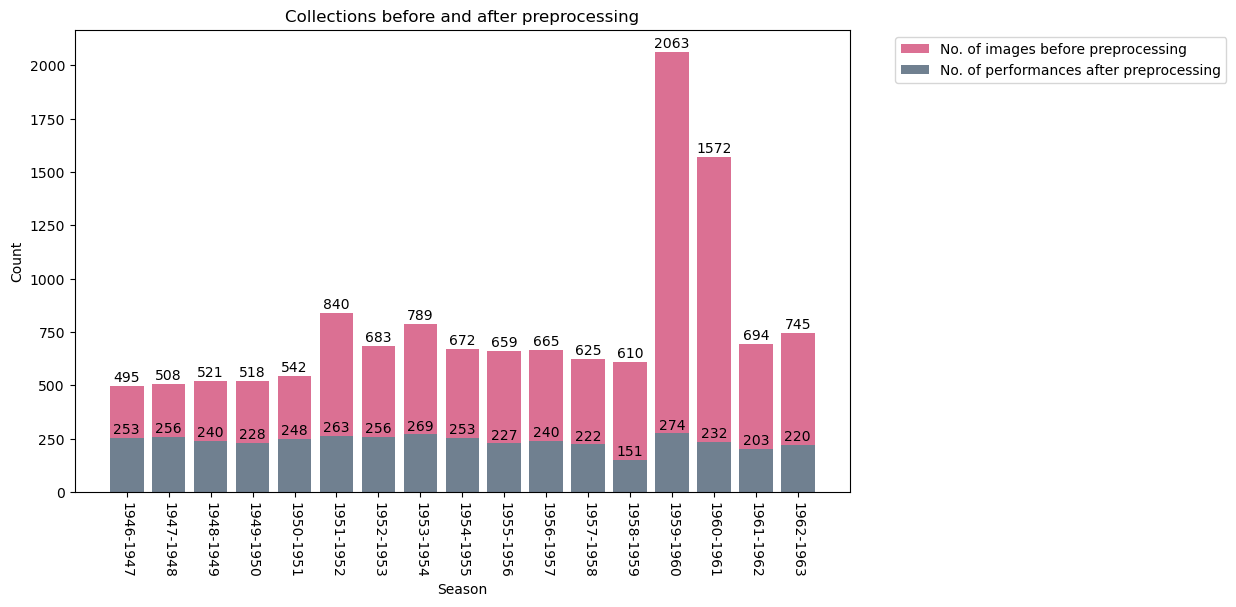

In [29]:
# Visualizing the difference after preprocessing
fig, ax = plt.subplots(figsize=(10, 6))

counts1 = df['Collection'].value_counts()[df2['Collection'].unique()].sort_index()
counts2 = df2['Collection'].value_counts().sort_index()

counts2 = counts2.sort_index()
x2 = counts2.index
y2 = counts2.values

counts1 = counts1.sort_index()

# Generate x and y data for the bar plot
x = counts1.index
y = counts1.values

# Plotting
bars1 = ax.bar(x, y, color='palevioletred', label='No. of images before preprocessing')
bars2 = ax.bar(x2, y2, color='slategrey', label='No. of performances after preprocessing')

# Adding counts in the bars
for bar, count in zip(bars1, y):
    height = bar.get_height()
    ax.annotate(f'{count}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center', va='bottom')

for bar, count in zip(bars2, y2):
    height = bar.get_height()
    ax.annotate(f'{count}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center', va='bottom')

# Adding ticks and labels to the x-axis
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=-90)

# Adding labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('Collections before and after preprocessing')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Merging datasets

In [30]:
# Loading the cleaned dataset containing Mona's and Elisabeth's data

df_1893_1946 = pd.read_csv("Merged_Dataset.csv", encoding='utf-8', index_col=False)
df_1893_1946.head()

,Unnamed: 0,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre,Season,Directors,Title_Language,Leaflet_Language,Opmerking
0,0,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,903641,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN,NaN
1,1,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,316913,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN
2,2,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,135474,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN,NaN
3,3,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,520507,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN
4,4,K.V.O. programmas 1893-97_00015-20211201_11352...,1893-1897,Charlotte Corday,1893-11-16,NaN,False,446314,Charlotte Corday,NL,Peter Benoit,?,Charlotte Corday,lyrisch drama,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN,NaN


In [31]:
# Checking shape of their merged dataset

df_1893_1946.shape

(6767, 19)

In [32]:
# Making sure the columns have the same name (column 'opmerking' is removed because it is not relevant for my thesis)

df_1893_1946 = df_1893_1946.rename(columns={"Multiple bill" : "Multiple Bill", 
                                            "Performances_ID" : "Performance_ID", 
                                            "Normalised title" : "Normalized Title",
                                            "Original language" : "Original Language",
                                            "Original premiere" : "Original Premiere",
                                            "Original title" : "Original Title",
                                            "genre" : "Genre",
                                            "Title_Language" : "Title Language",
                                            "Leaflet_Language" : "Leaflet Language"
                                           })

df_1893_1946 = df_1893_1946.drop(columns=["Opmerking"])

df_1893_1946.head()

,Unnamed: 0,Image,Collection,Production,Date,Occasion,Multiple Bill,Performance_ID,Normalized Title,Original Language,Composer,Original Premiere,Original Title,Genre,Season,Directors,Title Language,Leaflet Language
0,0,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,903641,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN
1,1,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,316913,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN
2,2,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,135474,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der Freischütz,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,NL,NaN
3,3,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,520507,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schiller’s 'Wilhelm Tell,romantische oper,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN
4,4,K.V.O. programmas 1893-97_00015-20211201_11352...,1893-1897,Charlotte Corday,1893-11-16,NaN,False,446314,Charlotte Corday,NL,Peter Benoit,?,Charlotte Corday,lyrisch drama,1893-1894,Edward Keurvels & Henry Fontaine,Unk,NaN


In [33]:
# Checking shape of my dataset

df2.shape

(4035, 17)

In [34]:
# Combining the dataset

df = pd.concat([df_1893_1946, df2], ignore_index=True)
df.sample(10)

,Unnamed: 0,Image,Collection,Production,Date,Occasion,Multiple Bill,Performance_ID,Normalized Title,Original Language,Composer,Original Premiere,Original Title,Genre,Season,Directors,Title Language,Leaflet Language
1927,1927.0,1918-1919_00036-20220207_094354.jpg,1918-1919,Faust,1919-01-05,NaN,False,145070,Faust,FR,Charles Gounod,1859,Faust,grand opera,1918-1919,Henry Fontaine,Unk,NaN
3814,3814.0,1930-1931_00444-20220209_164512.jpg,1930-1931,De Vledermuis,1931-01-18,NaN,False,301522,De Vledermuis,DUI,Johan Strauss,1874,Die Fledermaus,operetta,1930-1931,Fé Derickx & Bernard Tokkie,NL,NaN
10620,NaN,Scan 2024-04-29 1742-128.jpeg,1962-1963,La Traviata,1962-11-06 00:00:00,galavoorstelling,False,327351,Traviata,ITA,Giuseppe Verdi,1853,La traviata,opera semiseria,1962-1963,Renaat Verbruggen,Unk,ned
5219,5219.0,0204_1938-1939_00206-20230227_113810.jpg,1938-1939,Herbergprinses,1939-02-18,NaN,False,602744,Herbergprinses,NL,Jan Blockx,1896,Herbergprinses,zangspel,1938-1939,Jef Sterkens,NL,Dutch
10788,NaN,Scan 2024-04-29 1742-571.jpeg,1962-1963,Het Meisje van Zaventem,1963-05-26 00:00:00,NaN,False,676258,Het Meisje van Zaventem,NL,Emile Hullebroeck,1934,Het Meisje van Zaventem,zangspel,1962-1963,Renaat Verbruggen,NL,ned
9108,NaN,Scan 2024-03-18 1219-6.jpeg,1955-1956,Het Land van de Glimlach,1956-01-03 00:00:00,galavoorstelling,False,416225,Het Land van den Glimlach,DUI,Franz Lehár,1923,Das Land des Lächelns,leichte oper,1955-1956,August Baeyens,NL,ned
4221,4221.0,1932-1933_00219-20220210_134421.jpg,1932-1933,Het Land van den Glimlach,1933-02-09,NaN,False,173720,Het Land van den Glimlach,DUI,Franz Lehár,1923,Das Land des Lächelns,leichte oper,1932-1933,Flor Bosmans,NL,NaN
3297,3297.0,1927-1928_00707-20220208_143948.jpg,1927-1928,Beatrijs,1928-03-29,NaN,False,443518,Beatrijs,NL,Lilien,?,Beatrijs,?,1927-1928,Fé Derickx & Bernard Tokkie,Unk,NaN
10747,NaN,Scan 2024-04-29 1742-431.jpeg,1962-1963,De Grote Verzoeking van Sint Antonius,1963-03-21 00:00:00,NaN,True,229493,La Grande Tentation de Saint-Antoine,NL,Louis De Meester,1957,De grote verzoeking van Sint-Antonius,opera,1962-1963,Renaat Verbruggen,FR,ned
9777,NaN,Scan 2024-03-25 1047-246.jpeg,1958-1959,Hansje en Grietje,1959-03-22 00:00:00,NaN,False,456271,Hansje en Grietje,DUI,Engelbert Humperdinck,1893,Hänsel und Gretel,kinder opera,1958-1959,Mina Bolotine,NL,ned


In [35]:
# Again checking the shape

df.shape

(10802, 18)

In [36]:
# Delete all trailing and leading whitespace

for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

In [37]:
# Convert the date to datetime

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [38]:
# Save merged dataframe (1893-1963)

# df.to_csv('complete_dataset.csv', encoding = 'utf-8')